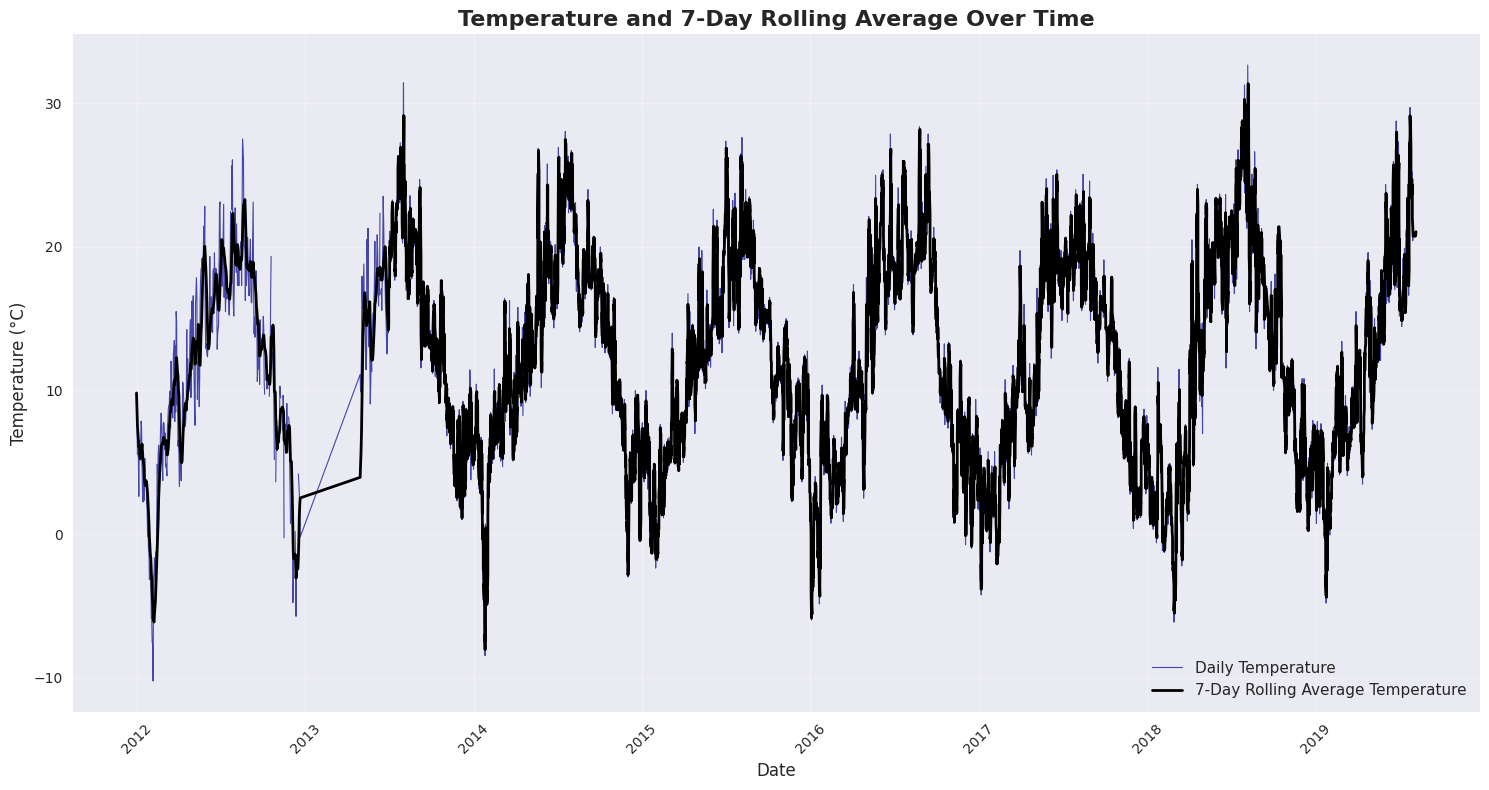


Temperature Statistics:
Daily Temperature - Mean: 12.01°C, Std: 7.20°C
7-Day Rolling Avg - Mean: 12.01°C, Std: 7.08°C
Data range: 2012-01-01 to 2019-08-07
Number of data points: 11596


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('../processed_data/combined_data_final.csv')

# Convert Datum to datetime
df['Datum'] = pd.to_datetime(df['Datum'])

# Remove rows where both temperature columns are NaN
df_temp = df.dropna(subset=['Temperatur', 'Temperatur_7day_rolling'], how='all')

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 8))

# Plot both temperature variables
ax.plot(df_temp['Datum'], df_temp['Temperatur'], 
        label='Daily Temperature', alpha=0.7, linewidth=0.8, color='darkblue')
ax.plot(df_temp['Datum'], df_temp['Temperatur_7day_rolling'], 
        label='7-Day Rolling Average Temperature', linewidth=2, color='black')

# Customize the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.set_title('Temperature and 7-Day Rolling Average Over Time', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics
print("\nTemperature Statistics:")
print(f"Daily Temperature - Mean: {df_temp['Temperatur'].mean():.2f}°C, Std: {df_temp['Temperatur'].std():.2f}°C")
print(f"7-Day Rolling Avg - Mean: {df_temp['Temperatur_7day_rolling'].mean():.2f}°C, Std: {df_temp['Temperatur_7day_rolling'].std():.2f}°C")
print(f"Data range: {df_temp['Datum'].min().strftime('%Y-%m-%d')} to {df_temp['Datum'].max().strftime('%Y-%m-%d')}")
print(f"Number of data points: {len(df_temp)}")

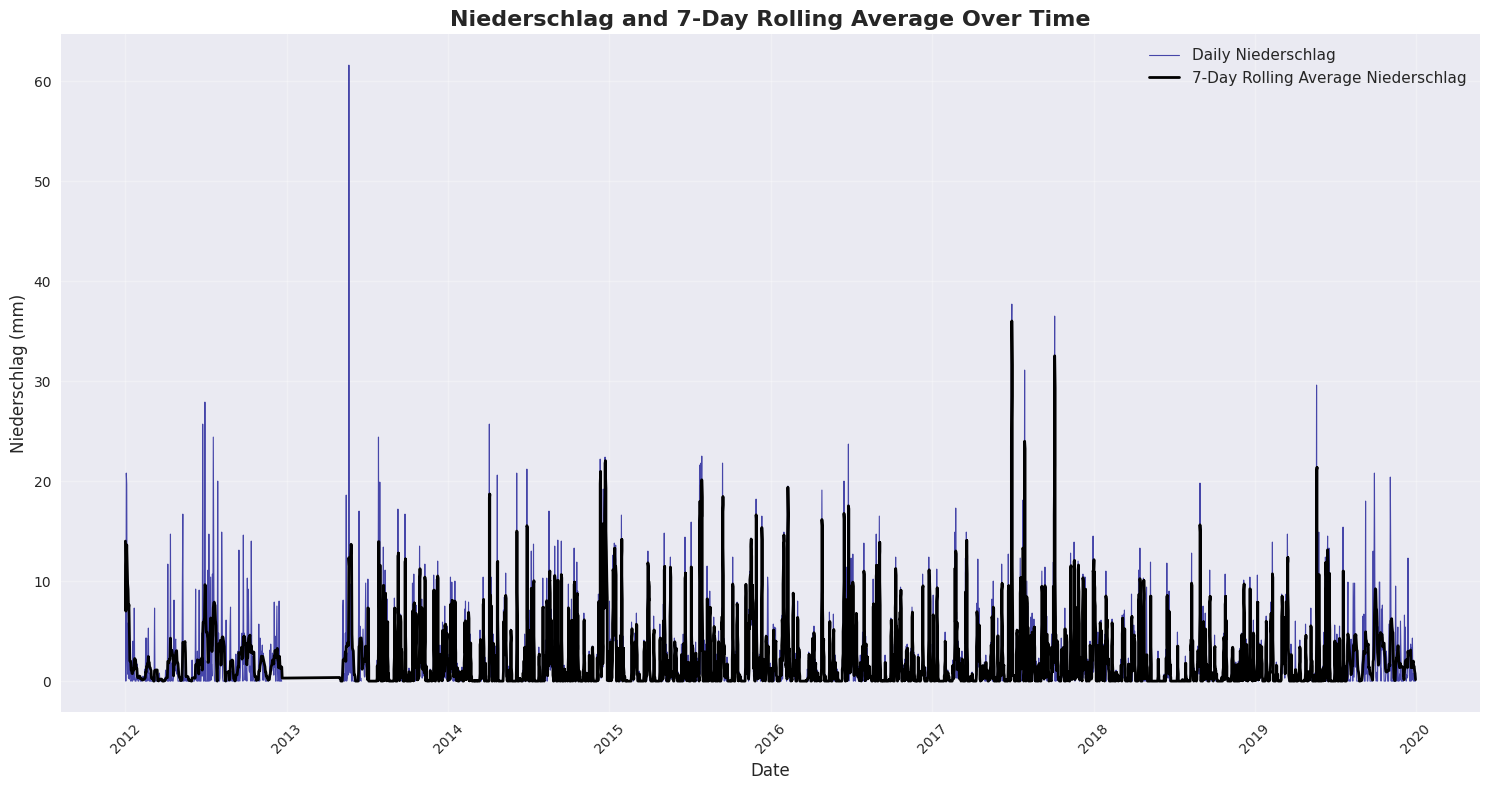


Niederschlag Statistics:
Daily Niederschlag - Mean: 2.05 mm, Std: 4.08 mm
7-Day Rolling Avg - Mean: 2.05 mm, Std: 3.25 mm
Data range: 2012-01-01 to 2019-12-31
Number of data points: 11782


In [3]:
# Remove rows where both Niederschlag columns are NaN
df_temp = df.dropna(subset=['Niederschlag', 'Niederschlag_7day_rolling'], how='all')

# Create the visualization
fig, ax = plt.subplots(figsize=(15, 8))

# Plot both temperature variables
ax.plot(df_temp['Datum'], df_temp['Niederschlag'], 
        label='Daily Niederschlag', alpha=0.7, linewidth=0.8, color='darkblue')
ax.plot(df_temp['Datum'], df_temp['Niederschlag_7day_rolling'], 
        label='7-Day Rolling Average Niederschlag', linewidth=2, color='black')

# Customize the plot
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Niederschlag (mm)', fontsize=12)
ax.set_title('Niederschlag and 7-Day Rolling Average Over Time', fontsize=16, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics
print("\nNiederschlag Statistics:")
print(f"Daily Niederschlag - Mean: {df_temp['Niederschlag'].mean():.2f} mm, Std: {df_temp['Niederschlag'].std():.2f} mm")
print(f"7-Day Rolling Avg - Mean: {df_temp['Niederschlag_7day_rolling'].mean():.2f} mm, Std: {df_temp['Niederschlag_7day_rolling'].std():.2f} mm")
print(f"Data range: {df_temp['Datum'].min().strftime('%Y-%m-%d')} to {df_temp['Datum'].max().strftime('%Y-%m-%d')}")
print(f"Number of data points: {len(df_temp)}")

--- Generating Weather Category Histogram ---


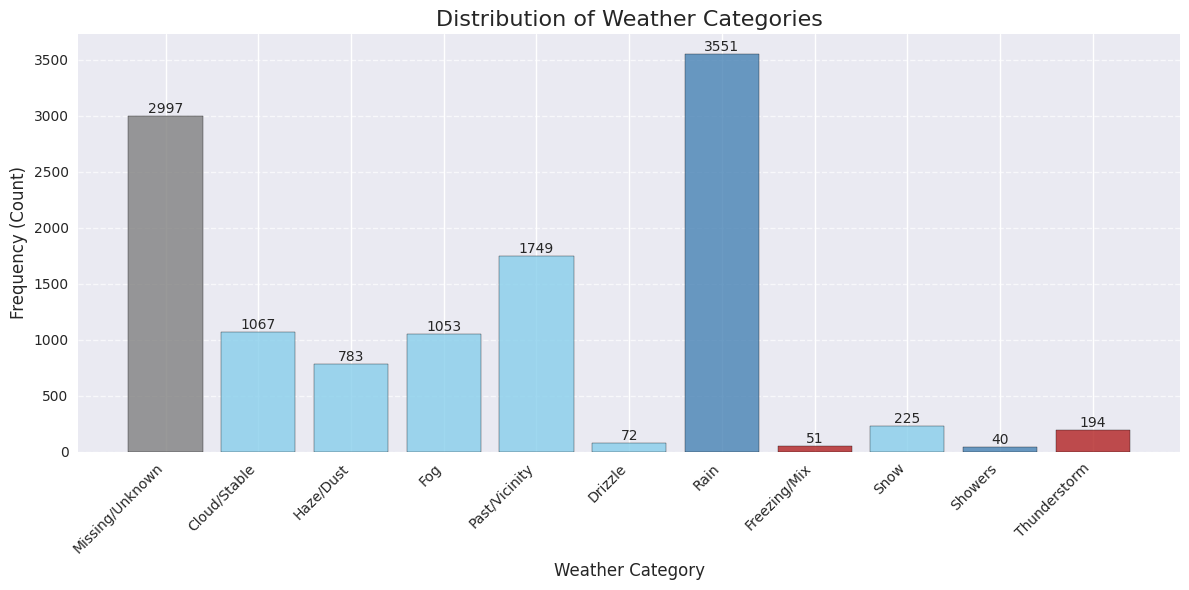

In [7]:
import calendar
print("--- Generating Weather Category Histogram ---")

# 1. Define the Categories and their Names (for the X-axis labels)
categories = [
    (-1, "Missing/Unknown"),
    (1, "Cloud/Stable"),
    (2, "Haze/Dust"),
    (3, "Fog"),
    (4, "Past/Vicinity"),
    (5, "Drizzle"),
    (6, "Rain"),
    (7, "Freezing/Mix"),
    (8, "Snow"),
    (9, "Showers"),
    (10, "Thunderstorm")
]

# 2. Calculate the counts by summing the One-Hot columns
# We loop through our list and sum the corresponding column in the dataframe
counts = []
labels = []
colors = []

for cat_id, cat_name in categories:
    col_name = f"W_Cat_{cat_id}"
    
    # Check if column exists (just in case)
    if col_name in df.columns:
        count = df[col_name].sum()
        counts.append(count)
        labels.append(cat_name)
        
        # Color logic: Gray for missing, Blue for standard, Red for severe
        if cat_id == -1: colors.append('gray')
        elif cat_id in [7, 10]: colors.append('firebrick') # Severe
        elif cat_id in [6, 9]: colors.append('steelblue')  # Rain/Showers
        else: colors.append('skyblue')
    else:
        # If column is missing, count is 0
        counts.append(0)
        labels.append(cat_name)
        colors.append('lightgray')

# 3. Create the Plot
plt.figure(figsize=(12, 6))

# Create bar chart
bars = plt.bar(labels, counts, color=colors, edgecolor='black', alpha=0.8)

# 4. Styling
plt.title('Distribution of Weather Categories', fontsize=16)
plt.xlabel('Weather Category', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels so they don't overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Fix layout so labels aren't cut off
plt.show()

--- Generating Monthly Weather Trends from 'Datum' ---


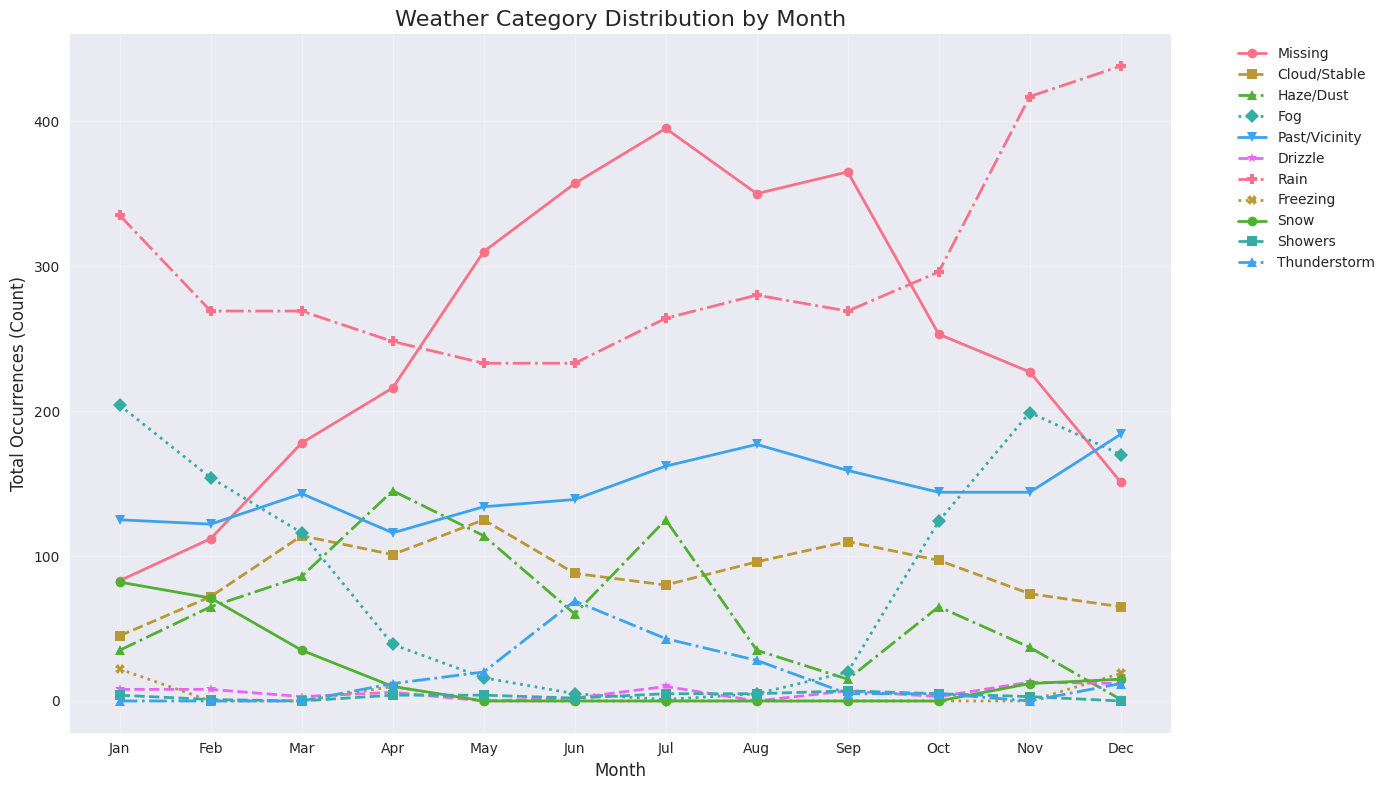

In [8]:

print("--- Generating Monthly Weather Trends from 'Datum' ---")

# 1. Convert 'Datum' to datetime objects
# This ensures pandas understands the string "2023-01-01" as a date.
df['Datum'] = pd.to_datetime(df['Datum'])

# 2. Extract the Month
# We use the .dt accessor to grab the month number (1=Jan, 12=Dec)
df['Month'] = df['Datum'].dt.month

# 3. Identify your Weather Columns
# We look for all columns starting with 'W_Cat_'
weather_cols = [c for c in df.columns if 'W_Cat_' in c]

if not weather_cols:
    print("Error: No 'W_Cat_' columns found. Did you run the encoding step?")
else:
    # 4. Group by Month and Sum
    monthly_counts = df.groupby('Month')[weather_cols].sum()

    # 5. Rename columns for the Legend (Optional but nicer)
    category_names = {
        'W_Cat_-1': "Missing",
        'W_Cat_1': "Cloud/Stable",
        'W_Cat_2': "Haze/Dust",
        'W_Cat_3': "Fog",
        'W_Cat_4': "Past/Vicinity",
        'W_Cat_5': "Drizzle",
        'W_Cat_6': "Rain",
        'W_Cat_7': "Freezing",
        'W_Cat_8': "Snow",
        'W_Cat_9': "Showers",
        'W_Cat_10': "Thunderstorm"
    }
    monthly_counts.rename(columns=category_names, inplace=True)

    # 6. Plotting
    plt.figure(figsize=(14, 8))

    styles = ['-', '--', '-.', ':'] 
    markers = ['o', 's', '^', 'D', 'v', '*', 'P', 'X'] 

    for i, column in enumerate(monthly_counts.columns):
        # Only plot if the category actually exists in the data
        if monthly_counts[column].sum() > 0:
            plt.plot(monthly_counts.index, 
                     monthly_counts[column], 
                     label=column,
                     linewidth=2,
                     marker=markers[i % len(markers)],
                     linestyle=styles[i % len(styles)])

    # Formatting
    plt.title('Weather Category Distribution by Month', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Occurrences (Count)', fontsize=12)
    
    # Map 1-12 to Jan-Dec
    plt.xticks(range(1, 13), calendar.month_abbr[1:13]) 
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.show()